In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
def foreground_model(alpha, beta,gamma,)

In [ ]:
def get_spectrum():
    binaries = self.base_population

In [132]:
def produce_pop(N):
    As = st.truncnorm.rvs(0.1,10,loc=0,scale=3,size=N)
    fs = st.uniform.rvs(0,1,size=N)
    return fs, As

In [133]:
N = 1000
test_pop = produce_pop(N)

(array([288., 222., 180., 140.,  81.,  48.,  17.,  12.,   6.,   6.]),
 array([0.30162335, 1.24680368, 2.19198401, 3.13716434, 4.08234467,
        5.02752501, 5.97270534, 6.91788567, 7.863066  , 8.80824633,
        9.75342667]),
 <BarContainer object of 10 artists>)

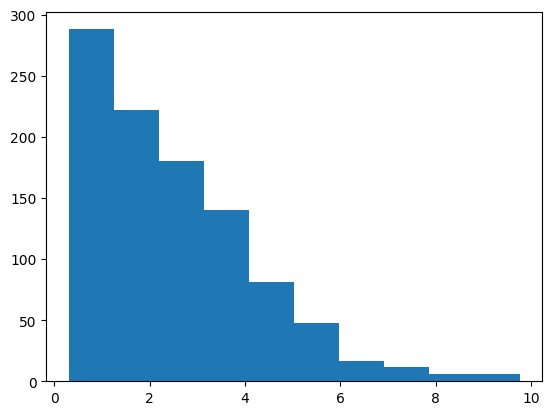

In [134]:
plt.hist(test_pop[1])

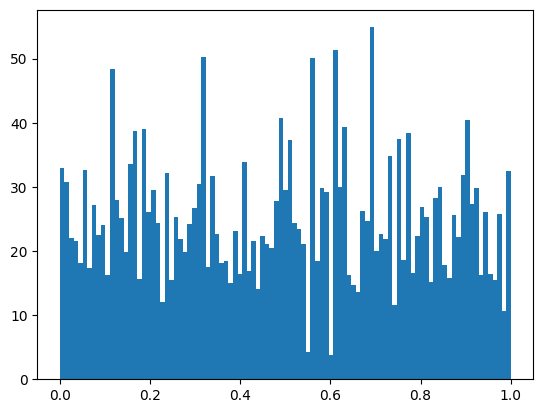

In [136]:
plt.figure()
plt.hist(test_pop[0],weights=test_pop[1],bins=np.linspace(0,1,100))
plt.show()


In [45]:
test_spec, test_bins = np.histogram(test_pop[0],weights=test_pop[1],bins=[0,0.25,0.5,0.75,1.0])

In [144]:
def get_snr(A,f,spec,spec_fs,noise_floor=1):
    f_bin = [True if f>=spec_fs[i] and f<spec_fs[i+1] else False for i in range(len(spec_fs)-1)]
    spec_at_f = spec[f_bin][0]
    return 2*A/np.sqrt(spec_at_f+noise_floor)

In [51]:
get_snr(test_pop[1][0],test_pop[0][0],test_spec,test_bins)

0.8560949068271179

In [54]:
snrs = np.array([get_snr(test_pop[1][i],test_pop[0][i],test_spec,test_bins) for i in range(N)])

In [56]:
def snr_cut(snr,snr_threshold):
    return np.greater(snr,snr_threshold)

In [60]:
snr_cut(snrs,1)

array([False, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False, False,
        True])

In [143]:
def get_spec(pop,bins=[0,0.25,0.5,0.75,1.0]):
    return np.histogram(pop[0],weights=pop[1],bins=bins)
def plot_spec(pop,bins=[0,0.25,0.5,0.75,1.0]):
#     spec,fbins = get_spec(pop,bins=bins)
    plt.figure()
    plt.hist(pop[0],weights=pop[1],bins=bins)
    plt.show()
    return
def get_pop_snrs(pop,bins=np.linspace(0,1,100),noise_floor=1):
    spec, fbins = get_spec(pop,bins=bins)
    snrs = np.array([get_snr(pop[1][i],pop[0][i],spec,fbins) for i in range(len(pop[0]))])
    return snrs

In [106]:
def iterative_subtract(pop,N_iter,snr_threshold,bins=[0,0.25,0.5,0.75,1.0]):
    
    ## get original spectrum
    unresolved_spec, fbins = np.histogram(pop[0],weights=pop[1],bins=bins)
    
    resolved_list = []
    resolved_snrs = []
    
    for i in range(N_iter):
        snrs_i = np.array([get_snr(pop[1][i],pop[0][i],unresolved_spec,fbins) for i in range(len(pop[0]))])
        cut_arr = snr_cut(snrs_i,snr_threshold)
        pop_resolved = (pop[0][cut_arr],pop[1][cut_arr])
        pop_unresolved = (pop[0][np.invert(cut_arr)],pop[1][np.invert(cut_arr)])
        resolved_list.append(pop_resolved)
        resolved_snrs.append(snrs_i[cut_arr])
        unresolved_spec, fbins = np.histogram(pop_unresolved[0],weights=pop_unresolved[1],bins=bins)
    
    return resolved_list, resolved_snrs, unresolved_spec, fbins

In [74]:
outlist, outspec, outbins = iterative_subtract(test_pop,10,0.9)

In [75]:
len(outlist[0][0])

44

In [137]:
large_pop = produce_pop(10000)

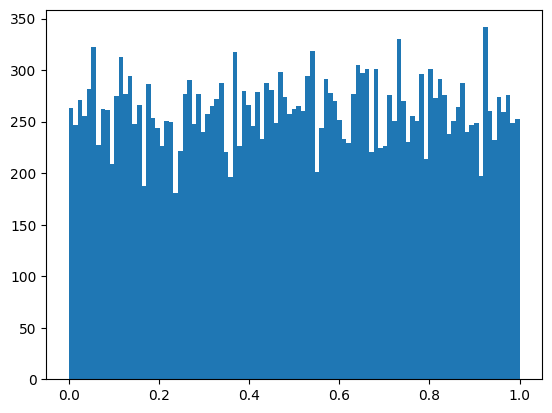

In [138]:
plot_spec(large_pop,bins=np.linspace(0,1,100))

In [139]:
get_pop_snrs(large_pop,bins=np.linspace(0,1,100))

array([0.19037618, 0.32560783, 0.2632374 , ..., 0.22575956, 0.22187529,
       0.46391196])

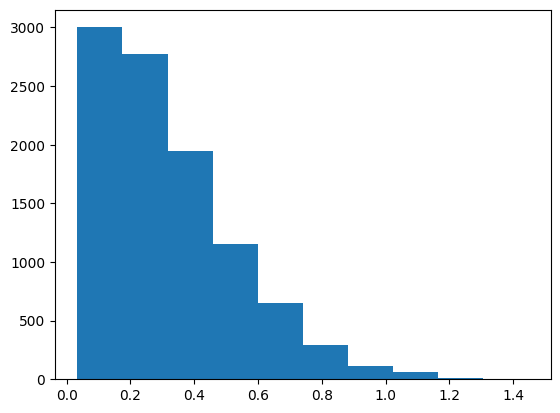

In [140]:
plt.figure()
plt.hist(get_pop_snrs(large_pop,bins=np.linspace(0,1,100),noise_floor=0.5))
plt.show()

In [152]:
outlist, outsnrs, outspec, outbins = iterative_subtract(large_pop,20,0.5,bins=np.linspace(0,1,100))

In [155]:
frac_resolved = [len(outlist[i][0])/10000 for i in range(len(outlist))]

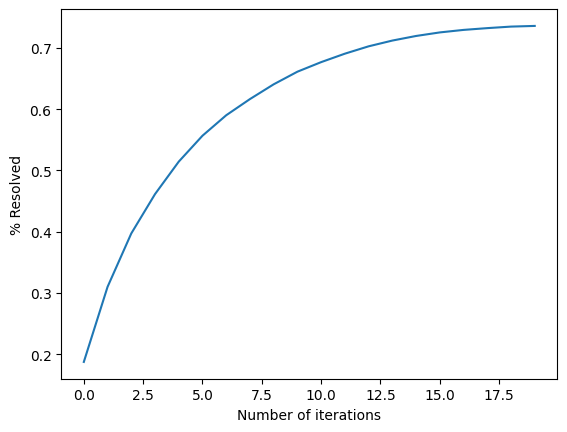

In [157]:
plt.figure()
plt.plot(np.arange(len(frac_resolved)),frac_resolved)
plt.xlabel('Number of iterations')
plt.ylabel('% Resolved')
plt.show()

In [153]:
for i in range(len(outlist)):
    print(len(outlist[i][0]))

1875
3100
3972
4614
5144
5567
5901
6165
6406
6612
6768
6906
7026
7120
7195
7253
7294
7323
7348
7359


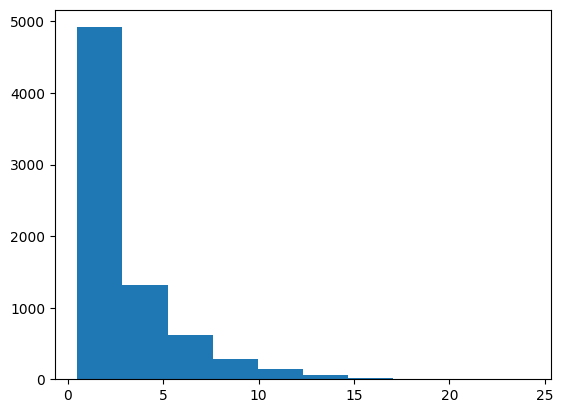

In [154]:
plt.figure()
plt.hist(outsnrs[-1])
plt.show()

In [ ]:
def 